<a href="https://colab.research.google.com/github/kk-shetty/data_science_ik/blob/main/assingments/eda_and_feature_engineering/LeetCode_Dataset_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Please make a copy of this notebook and try solving the below questions in your notebook copy. Solutions for these will be discussed in the assignment review session on <day> post which, we will also share the solution notebook.


# **Good Luck**

##LeetCode DataSet
It contains the following info:

- **id**: problem id
- **title**: problem name
- **description**: problem description
- **is_premium**: whether the questions requires a premium account
- **difficulty**: easy, medium, or hard
- **solution_link**: how often the answer submitted is correct
- **acceptance_rate**: how often the answer submitted is correct
- **frequency**: how often the problem is attempted
- **url**: url to the problem
- **discuss_count**: how many comments are submitted by users
- **accepted**: how many times the answer was accepted
- **submissions**: how many times the answer was submitted
- **companies**: which companies were tagged as having asked this specific problem
- **related_topics**: related topics to the current problem
- **likes**: how many likes the problem got
- **dislikes**: how many dislikes the problem got
- **rating**: likes / (likes + dislikes)
- **asked_by_faang**: whether or not the question was asked by facebook, apple, amazon, google, or netflix
- **similar_questions**: similar problems with problem name, slug, and difficulty


In [92]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
# Loading the dataset into pandas
# Using the download URL of the file uploaded on Google drive
file_url = 'https://drive.google.com/uc?export=download&id=1RrRNADQK5b-S4eBlNMxU3UH2-bhv-k8a'
df_leetcode = pd.read_csv(file_url, sep='\t')

In [94]:
# Verifying loaded data
df_leetcode.sample(10)

,id,title,description,is_premium,difficulty,solution_link,acceptance_rate,frequency,url,discuss_count,accepted,submissions,companies,related_topics,likes,dislikes,rating,asked_by_faang,similar_questions
1591,1592,Rearrange Spaces Between Words,You are given a string `text` of words that ar...,0,Easy,NaN,43.6,3.7,https://leetcode.com/problems/rearrange-spaces...,256,19.4K,44.5K,Google,String,129,133,49,1,"[Text Justification, /problems/text-justificat..."
429,430,Flatten a Multilevel Doubly Linked List,You are given a doubly linked list which in ad...,0,Medium,/articles/flatten-a-multilevel-doubly-linked-list,57.0,42.3,https://leetcode.com/problems/flatten-a-multil...,999,155K,272.1K,"Bloomberg,Facebook","Linked List,Depth-first Search",2179,187,92,1,"[Flatten Binary Tree to Linked List, /problems..."
852,853,Car Fleet,`N` cars are going to the same destination alo...,0,Medium,/articles/car-fleet,44.3,35.9,https://leetcode.com/problems/car-fleet,212,38.6K,87.2K,"Google,Nutanix",Sort,658,272,71,1,"[Car Fleet II, /problems/car-fleet-ii/, Hard]"
159,160,Intersection of Two Linked Lists,Given the heads of two singly linked-lists `he...,0,Easy,/articles/intersection-of-two-linked-lists,44.5,43.8,https://leetcode.com/problems/intersection-of-...,999,647.6K,1.5M,"Microsoft,Amazon,Facebook,Apple,ByteDance,Payp...",Linked List,5392,607,90,1,"[Minimum Index Sum of Two Lists, /problems/min..."
1539,1540,Can Convert String in K Moves,"Given two strings `s` and `t`, your goal is to...",0,Medium,NaN,31.2,7.2,https://leetcode.com/problems/can-convert-stri...,175,9.9K,31.9K,Infosys,"String,Greedy",203,160,56,0,NaN
553,554,Brick Wall,There is a brick wall in front of you. The wal...,0,Medium,/articles/brick-wall,50.8,18.5,https://leetcode.com/problems/brick-wall,342,68.5K,134.9K,Oracle,Hash Table,1148,58,95,0,NaN
1741,1742,Maximum Number of Balls in a Box,You are working in a ball factory where you ha...,0,Easy,NaN,73.8,1.0,https://leetcode.com/problems/maximum-number-o...,203,19.2K,26K,"AppDynamics,Lucid",Array,148,24,86,0,NaN
780,781,Rabbits in Forest,"In a forest, each rabbit has some color. Some ...",0,Medium,/articles/rabbits-in-forest,55.8,1.8,https://leetcode.com/problems/rabbits-in-forest,319,25.9K,46.4K,Wish,"Hash Table,Math",386,363,52,0,NaN
1183,1184,Distance Between Bus Stops,A bus has `n` stops numbered from `0` to `n - ...,0,Easy,NaN,53.9,4.3,https://leetcode.com/problems/distance-between...,529,31.4K,58.2K,Google,Array,343,36,91,1,NaN
941,942,DI String Match,A permutation `perm` of `n + 1` integers of al...,0,Easy,/articles/di-string-match,73.7,7.6,https://leetcode.com/problems/di-string-match,609,80.5K,109.1K,Uber,Math,1129,437,72,0,NaN


##Question 1
####What is the Shape of the dataset?

In [95]:
#Solution 1(your code here)
df_leetcode.shape

(1825, 19)

##Question 2
####What is the datatype of **accepted** and **acceptance rate** fields?

In [96]:
#Solution 2(your code here)
df_leetcode[['accepted','acceptance_rate']].info()

# accepted -> object (string)
# acceptance_rate -> float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   accepted         1825 non-null   object 
 1   acceptance_rate  1825 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.6+ KB


##Question 3
####What is the number of missing values correponsing to each field?

In [97]:
#Solution 3(your code here)

# We can use isna() function on the df to get boolean value dataframe and then use .sum() compute missing values at each column
df_leetcode.isna().sum(axis=0)

id                      0
title                   0
description             0
is_premium              0
difficulty              0
solution_link         838
acceptance_rate         0
frequency               0
url                     0
discuss_count           0
accepted                0
submissions             0
companies              76
related_topics        254
likes                   0
dislikes                0
rating                  0
asked_by_faang          0
similar_questions    1080
dtype: int64

##Question 4
####What is the cardinality of the columns?

In [98]:
#Solution 4(your code here)

# To calculate the cardinality (number of unique values) we can use nunique() function
df_leetcode.nunique()

id                   1825
title                1825
description          1670
is_premium              2
difficulty              3
solution_link         987
acceptance_rate       576
frequency             619
url                  1825
discuss_count         642
accepted             1098
submissions          1236
companies             691
related_topics        320
likes                1161
dislikes              603
rating                 94
asked_by_faang          2
similar_questions     689
dtype: int64

##Question 5
####Give 2 inferences from the .describe() of the dataset.

In [99]:
#Solution 5(your code here)
df_leetcode.describe()

#1 - 21.8% of the questions are premium
#2 - 53% is the average acceptance rate with 95.6% being highest and 13.9% being the lowest
#3 - Question with highest likes has 20,217 likes
#4 - 67% of these questions are asked by faang companies

,id,is_premium,acceptance_rate,frequency,discuss_count,likes,dislikes,rating,asked_by_faang
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,913.000000,0.218082,53.139616,21.113041,421.435068,1050.534795,279.010959,77.391233,0.671233
std,526.976438,0.413057,14.778411,22.364741,330.583617,1512.674013,608.489206,23.317515,0.469894
min,1.000000,0.000000,13.900000,0.000000,9.000000,2.000000,0.000000,7.000000,0.000000
25%,457.000000,0.000000,42.400000,3.100000,150.000000,217.000000,32.000000,67.000000,0.000000
50%,913.000000,0.000000,51.600000,13.500000,292.000000,516.000000,92.000000,88.000000,1.000000
75%,1369.000000,0.000000,62.800000,31.800000,663.000000,1200.000000,239.000000,95.000000,1.000000
max,1825.000000,1.000000,95.600000,100.000000,999.000000,20217.000000,8900.000000,100.000000,1.000000


##Question 6
####Plot the outliners in the dataset.

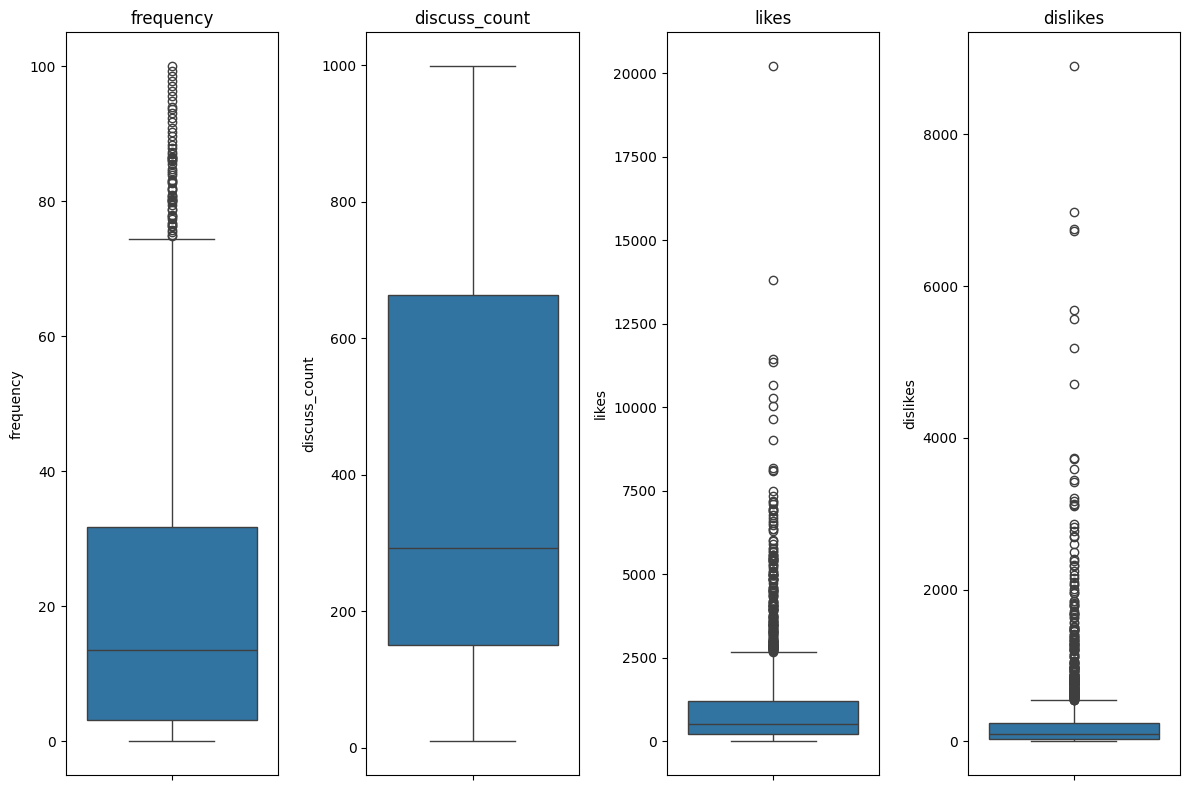

In [100]:
#Solution 6(your code here)

# By analysing the output of describe, I see that there might be outliers in the below filed
# 1. frequency
# 2. discuss_count
# 3. likes - median is 516 where as mean is 1050.
# 4. dislikes

# Create a 1x4 subplot
fig, axes = plt.subplots(1, 4, figsize=(12, 8))

# Plot box plots for each field using sns.boxplot and the data parameter
sns.boxplot(df_leetcode['frequency'], ax=axes[0])
sns.boxplot(df_leetcode['discuss_count'], ax=axes[1])
sns.boxplot(df_leetcode['likes'], ax=axes[2])
sns.boxplot(df_leetcode['dislikes'], ax=axes[3])

# Set titles for each subplot
axes[0].set_title('frequency')
axes[1].set_title('discuss_count')
axes[2].set_title('likes')
axes[3].set_title('dislikes')

plt.tight_layout()
plt.show()

##Question 7
####**is_premium**, **difficulty** , **rating** and **asked_by_faang** are four important parameters in the dataset. Plot/calculate all possible relation between them and explain the relationship.

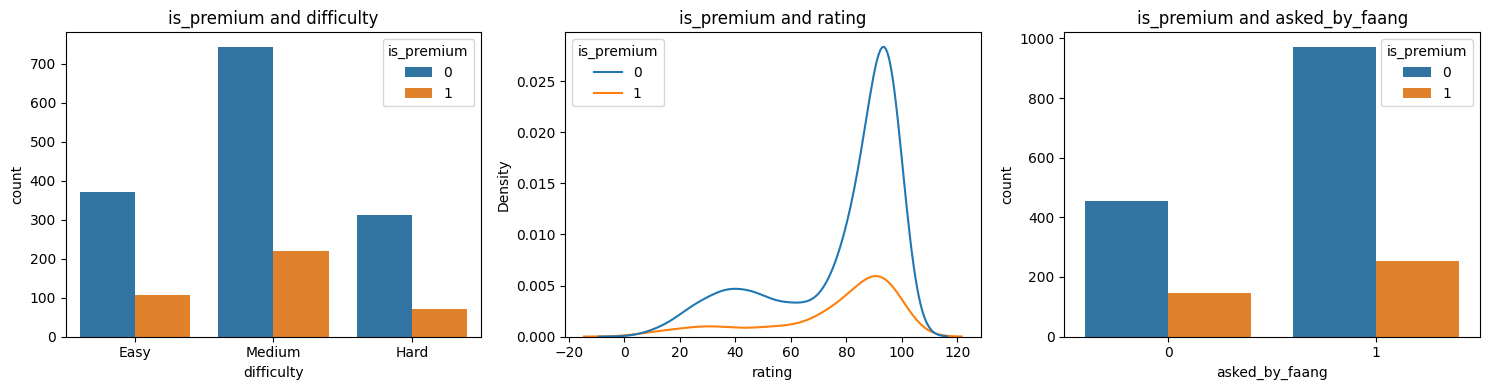

In [101]:
#Solution 7(your code here)

# Finding how is_premium is related to rest of the key parameters
# Create a 1x4 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1. Finding relation between is_premium and difficulty
sns.countplot(data=df_leetcode, x='difficulty', hue='is_premium', ax=axes[0])
# 2. Finding relation between is_premium and rating
sns.kdeplot(data=df_leetcode, x='rating', hue='is_premium', ax=axes[1])
# 3. Finding relation between is_premium and asked_by_faang
sns.countplot(data=df_leetcode, x='asked_by_faang', hue='is_premium', ax=axes[2])

# Set titles for each subplot
axes[0].set_title('is_premium and difficulty')
axes[1].set_title('is_premium and rating')
axes[2].set_title('is_premium and asked_by_faang')

plt.tight_layout()
plt.show()

* **Observations**:
1. The proporion of premium question is almost similar across easy, medium and hard questions.
2. Most number of questions have rating around 90. Again, this is similar for both premium and non premium questions.
3. The proportion of preium and non premium question is similar in both type of questions - asked_by_faang.

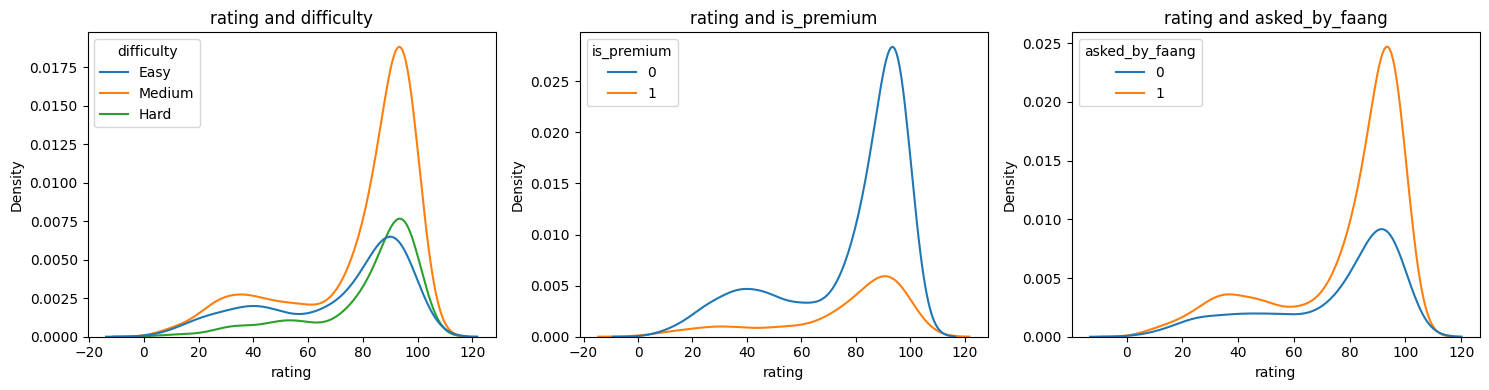

In [102]:
# Finding how rating is related to rest of the key parameters
# Create a 1x4 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1. Finding relation between rating and difficulty
sns.kdeplot(data=df_leetcode, x='rating', hue='difficulty', ax=axes[0])
# 2. Finding relation between rating and rating
sns.kdeplot(data=df_leetcode, x='rating', hue='is_premium', ax=axes[1])
# 3. Finding relation between rating and asked_by_faang
sns.kdeplot(data=df_leetcode, x='rating', hue='asked_by_faang', ax=axes[2])

# Set titles for each subplot
axes[0].set_title('rating and difficulty')
axes[1].set_title('rating and is_premium')
axes[2].set_title('rating and asked_by_faang')

plt.tight_layout()
plt.show()

* **Observations**: from above plots we see that distribution of rating is similar across all the parametres. Only for difficulties we see that most number of easy questions have marginally less ratings compared to the hard questions.

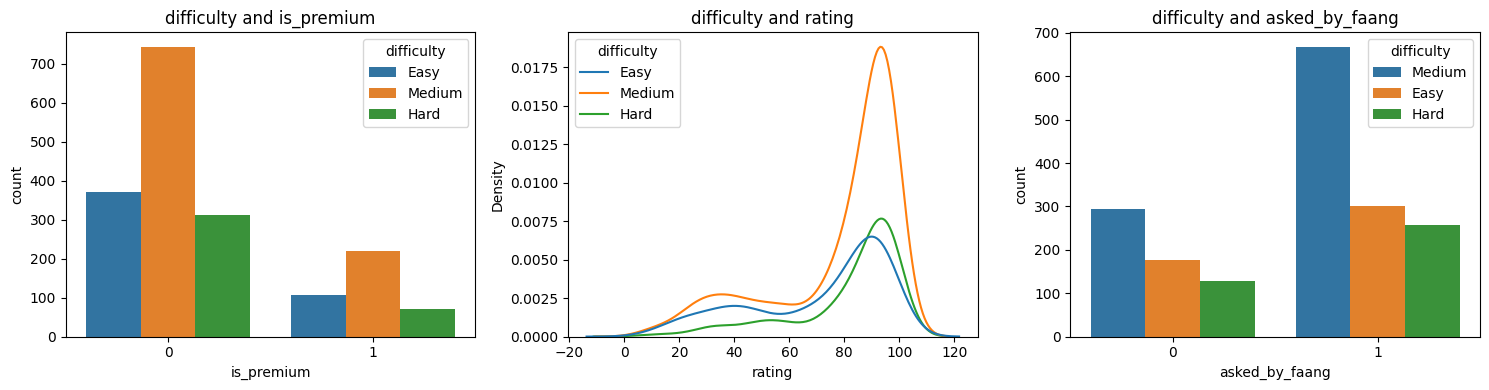

In [103]:
# Finding how difficulty is related to rest of the key parameters
# Create a 1x4 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1. Finding relation between difficulty is_premium
sns.countplot(data=df_leetcode, x='is_premium', hue='difficulty', ax=axes[0])
# 2. Finding relation between difficulty and rating
sns.kdeplot(data=df_leetcode, x='rating', hue='difficulty', ax=axes[1])
# 3. Finding relation between difficulty and asked_by_faang
sns.countplot(data=df_leetcode, x='asked_by_faang', hue='difficulty', ax=axes[2])

# Set titles for each subplot
axes[0].set_title('difficulty and is_premium')
axes[1].set_title('difficulty and rating')
axes[2].set_title('difficulty and asked_by_faang')

plt.tight_layout()
plt.show()

* **Observations**:
1. The proporion of different difficulty levels are similar in both premium and non premium questions
2. Only for difficulties we see that most number of easy questions have marginally less ratings compared to the hard questions.
3. The proportion of medium difficulty questions are asked more in faang

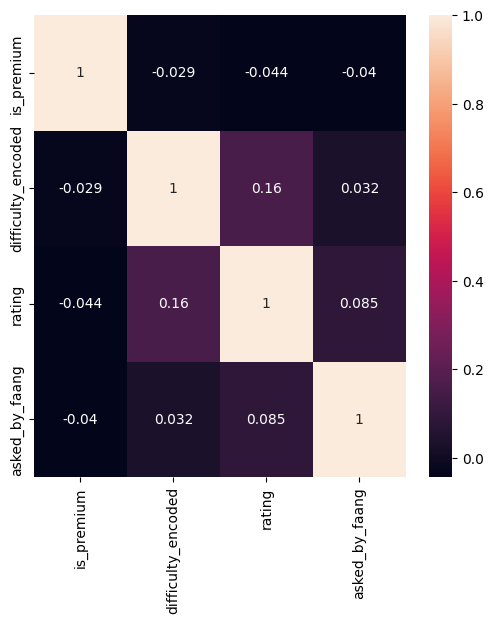

In [104]:
# Finding the correlation between these parameters.

# We need to convert difficulty columns from Categorical to numerical using ordenal encoding
# df_leetcode['difficulty'].value_counts()
difficulty_enode = {
    'Easy' : 0,
    'Medium' : 1,
    'Hard' : 2
}
df_leetcode['difficulty_encoded'] = df_leetcode.apply(lambda x : difficulty_enode[x['difficulty']], axis=1)

# Plotting correlation matrix between the above fields
plt.figure(figsize=(6,6))
sns.heatmap(
    df_leetcode[['is_premium', 'difficulty_encoded', 'rating', 'asked_by_faang']].corr(),
    annot=True
)

plt.show()

* **Observations** :
1. Here we see that is_premium is least correlated to all the other parameters.
2. rating and difficulty level are the most correlated parametres among all other parametrs.

##Question 8
####Plot top 20 companies whose problems are listed in this dataset.

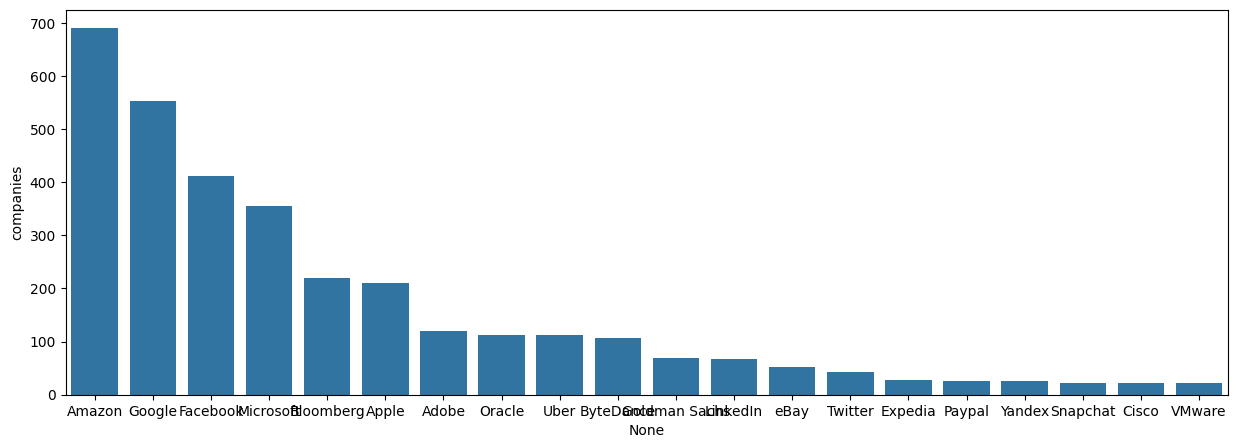

In [173]:
#Solution 8(your code here)

plt.figure(figsize=(15,5))
sns.barplot(
    x=df_leetcode['companies'].str.split(',').explode().value_counts()[:20].index,
    y=df_leetcode['companies'].str.split(',').explode().value_counts()[:20]
)
plt.show()